# This workflow has been used to design algorthmic trading strategy 

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import talib as ta
from category_encoders import TargetEncoder
from scipy.stats import mode
import fAux

%matplotlib inline

In [2]:
# Read the CSV file
df = pd.read_csv('csv_files/bitcoin_techindicators_filtered_normalized.csv')

# Assuming 'Date' is the name of your datetime column
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'Date' column to datetime objects
df.set_index('Date', inplace=True)  # Set the 'Date' column as the DataFrame index
df

,open,high,low,close,adj close,volume,sentiment,btc_trans_blockchain,avg_block_size,unique_sentbyaddress,...,ema_12,ema_26,macd,signal_line,rsi,%k,%d,middle_band,upper_band,lower_band
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-28,316.160004,320.028015,311.078003,317.239014,317.239014,11676600,1,0.038075,0.016595,144477.0,...,-0.004683,-0.004285,-0.508608,-0.681881,-0.018070,-0.103646,-0.036527,-0.006363,-0.011871,0.000262
2014-12-29,317.700989,320.266998,312.307007,312.670013,312.670013,12302500,-1,0.038075,0.016595,135586.0,...,-0.007381,-0.006499,-0.508608,-0.681881,-0.042309,-0.261805,-0.238912,-0.008259,-0.012371,-0.003321
2014-12-30,312.718994,314.808990,309.372986,310.737000,310.737000,12528300,0,0.038075,0.016595,144680.0,...,-0.009756,-0.008527,-0.508608,-0.681881,-0.044299,-0.185886,-0.203749,-0.009734,-0.012006,-0.006996
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900,-1,0.038075,0.016595,122759.0,...,-0.007848,-0.008519,-0.508608,-0.681881,0.078077,0.505951,0.052866,-0.010620,-0.015802,-0.004458
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,-1,0.038075,0.016595,93422.0,...,-0.008657,-0.009573,-0.508608,-0.681881,0.012601,-0.114383,0.080269,-0.012508,-0.021293,-0.002163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812,-1,-0.140453,-0.003747,428273.0,...,-0.006374,0.015545,-0.508481,-0.239341,-0.111988,-0.318888,-0.461249,0.025145,-0.003951,0.063527
2024-03-24,64070.753906,67622.757813,63825.851563,67234.171875,67234.171875,27206630673,1,-0.139135,-0.006067,394673.0,...,-0.002965,0.015506,-0.433433,-0.270286,-0.013476,0.280188,-0.260005,0.019910,-0.003912,0.051332
2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500,69958.812500,42700139523,1,-0.133062,-0.016933,404678.0,...,0.004623,0.017808,-0.279264,-0.275503,0.043666,0.513611,0.104667,0.020008,-0.001870,0.048565


In [3]:
window_features = []
#buld the best window features after the exploratory data analysis using Bitcoin.ipynb file :
for n in list(range(1,6)):
    name = 'ret' + str(n)
    window_features.append(name)
    df[name] = df["open"].pct_change(periods=n) #for trading with open
df

,open,high,low,close,adj close,volume,sentiment,btc_trans_blockchain,avg_block_size,unique_sentbyaddress,...,%k,%d,middle_band,upper_band,lower_band,ret1,ret2,ret3,ret4,ret5
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-28,316.160004,320.028015,311.078003,317.239014,317.239014,11676600,1,0.038075,0.016595,144477.0,...,-0.103646,-0.036527,-0.006363,-0.011871,0.000262,NaN,NaN,NaN,NaN,NaN
2014-12-29,317.700989,320.266998,312.307007,312.670013,312.670013,12302500,-1,0.038075,0.016595,135586.0,...,-0.261805,-0.238912,-0.008259,-0.012371,-0.003321,0.004874,NaN,NaN,NaN,NaN
2014-12-30,312.718994,314.808990,309.372986,310.737000,310.737000,12528300,0,0.038075,0.016595,144680.0,...,-0.185886,-0.203749,-0.009734,-0.012006,-0.006996,-0.015681,-0.010884,NaN,NaN,NaN
2014-12-31,310.914001,320.192993,310.210999,320.192993,320.192993,13942900,-1,0.038075,0.016595,122759.0,...,0.505951,0.052866,-0.010620,-0.015802,-0.004458,-0.005772,-0.021363,-0.016593,NaN,NaN
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550,-1,0.038075,0.016595,93422.0,...,-0.114383,0.080269,-0.012508,-0.021293,-0.002163,0.030623,0.024674,0.008606,0.013522,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-23,63802.722656,65976.398438,63038.492188,64062.203125,64062.203125,24738964812,-1,-0.140453,-0.003747,428273.0,...,-0.318888,-0.461249,0.025145,-0.003951,0.063527,-0.025763,-0.060503,0.030237,-0.055560,-0.066820
2024-03-24,64070.753906,67622.757813,63825.851563,67234.171875,67234.171875,27206630673,1,-0.139135,-0.006067,394673.0,...,0.280188,-0.260005,0.019910,-0.003912,0.051332,0.004201,-0.021670,-0.056556,0.034565,-0.051592
2024-03-25,67234.093750,71162.593750,66414.835938,69958.812500,69958.812500,42700139523,1,-0.133062,-0.016933,404678.0,...,0.513611,0.104667,0.020008,-0.001870,0.048565,0.049373,0.053781,0.026633,-0.009976,0.085644


In [4]:
#build target assuming we know today's open
df['target_returns'] = df['open'].pct_change(1).shift(-1).fillna(0) #if you enter the trade immediately after the open

In [5]:
# Drop the first 20 rows of the DataFrame
df = df.iloc[20:]
df = df.fillna(method='ffill')
df_original = df.copy()

#select the features (by dropping)
cols_to_drop = ["open","high","low","close","volume","adj close"]
df.drop(cols_to_drop, axis=1, inplace=True)
df

,sentiment,btc_trans_blockchain,avg_block_size,unique_sentbyaddress,avg_hashrate,sent_in_usd,median_trans_fee,avg_block_confirm_time_min,median_trans_value_usd,sma_20,...,%d,middle_band,upper_band,lower_band,ret1,ret2,ret3,ret4,ret5,target_returns
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-17,0,0.038075,0.016595,179369.0,0.208460,0.122588,-0.003411,10.435,-0.244182,-0.070305,...,0.246683,-0.070305,0.005997,-0.193900,-0.005912,0.174887,-0.071730,-0.222743,-0.219098,-0.037453
2015-01-18,0,0.038075,0.016595,149221.0,0.208460,0.122588,-0.002385,9.412,-0.306788,-0.073053,...,0.242458,-0.073053,-0.004177,-0.186760,-0.037453,-0.043143,0.130884,-0.106497,-0.251853,0.057091
2015-01-19,-1,0.038075,0.016595,166356.0,0.208460,0.122588,-0.001469,10.000,-0.148526,-0.074614,...,0.280697,-0.074614,-0.015470,-0.173195,0.057091,0.017500,0.011484,0.195447,-0.055486,0.006791
2015-01-20,1,0.038075,0.016595,159415.0,0.208460,0.122588,-0.001280,12.203,-0.119285,-0.078272,...,0.311701,-0.078272,-0.031840,-0.155066,0.006791,0.064269,0.024409,0.018353,0.203565,-0.007182
2015-01-21,1,0.038075,0.016595,159612.0,0.208460,0.122588,-0.000726,9.664,-0.137093,-0.078128,...,0.367735,-0.078128,-0.047428,-0.126754,-0.007182,-0.000440,0.056626,0.017052,0.011039,0.075429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-23,-1,-0.140453,-0.003747,428273.0,0.395053,0.666413,-0.240412,9.231,-0.211032,0.025145,...,-0.461249,0.025145,-0.003951,0.063527,-0.025763,-0.060503,0.030237,-0.055560,-0.066820,0.004201
2024-03-24,1,-0.139135,-0.006067,394673.0,0.406018,0.540654,-0.385840,8.471,-0.423984,0.019910,...,-0.260005,0.019910,-0.003912,0.051332,0.004201,-0.021670,-0.056556,0.034565,-0.051592,0.049373
2024-03-25,1,-0.133062,-0.016933,404678.0,0.411923,0.504461,0.013674,10.909,0.499829,0.020008,...,0.104667,0.020008,-0.001870,0.048565,0.049373,0.053781,0.026633,-0.009976,0.085644,0.040117


In [6]:
# df.to_csv('csv_files/main.csv', index=True, encoding='utf-8')

In [7]:
#distribute the df data into X inputs and y target
X = df.drop(['target_returns'], axis=1)
y = df[['target_returns']]

train_len = int(df.shape[0]*0.8) # 80/20 split for training and test sets

#select the samples
X_train = X.iloc[0:train_len]
X_test = X.iloc[train_len:]

y_train = y.iloc[0:train_len]
y_test = y.iloc[train_len:]

df_train = df.iloc[0:train_len]
df_test = df.iloc[train_len:]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from scipy.stats import spearmanr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

In [9]:
# Define a custom scorer function based on Spearman's rank correlation (Information Coefficient)
def information_coefficient(y_true, y_pred):
    rho, pval = spearmanr(y_true, y_pred)
    # print("Information Coefficient (rho):", rho)
    return rho

# Custom scorer
spearman_scorer = make_scorer(information_coefficient, greater_is_better=True)

In [10]:
# Identifying numeric and categorical features
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['int64']).columns.tolist()

# Setting up the preprocessing pipelines
numeric_sub_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler()),
    ])
categorical_sub_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('onehot', OneHotEncoder())])

# Combining preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_sub_pipeline, numeric_features),
        ('cat', categorical_sub_pipeline, categorical_features)],
    remainder='passthrough')

# pipeline = Pipeline([
#     ('preprocessor', preprocessor),  # Standardize all the feature columns
#     ('regressor', GradientBoostingRegressor(random_state=42))
# ])

In [15]:
# ridgeRegressor search parameters
param_grid_rr =  [{'regressor__alpha': np.logspace(-5, 2, num=20, endpoint = True) # Ridge regression alpha
                   }]


# Random Forest Regressor search parameters
param_grid_rfr = [{
    'regressor__n_estimators': np.arange(100, 1001, 100),  # 100 to 1000 trees in steps of 100
    'regressor__max_features': ['auto', 'sqrt', 'log2', 0.2, 0.5],  # Options for max features
    'regressor__max_depth': [None] + list(np.arange(5, 51, 5)),  # None means unlimited depth
    'regressor__min_samples_split': [2, 5, 10, 20],  # Minimum samples per split
    'regressor__min_samples_leaf': [1, 2, 4, 10],  # Minimum samples at each leaf node
    'regressor__bootstrap': [True, False]  # Method for sampling data points
}]

# Gradient Boosting Regressor search parameters
param_grid_gbr = [{
    'regressor__n_estimators': np.arange(100, 1001, 100),  # Number of trees
    'regressor__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 8, 10, 12],  # Maximum depth of each tree
    'regressor__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'regressor__max_features': [None, 'sqrt', 'log2', 0.2, 0.5],  # The number of features to consider when looking for the best split
    'regressor__subsample': [0.6, 0.8, 1.0]  # The fraction of samples to use for fitting
}]

# Extra Trees Regressor search parameters
param_grid_etr = {
    'regressor__n_estimators': np.arange(100, 1001, 100),  # Trees in the forest
    'regressor__max_features': ['auto', 'sqrt', 'log2', 0.2, 0.5],  # Number of features to consider at every split
    'regressor__max_depth': [None] + list(np.arange(5, 51, 5)),  # Maximum number of levels in tree
    'regressor__min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split a node
    'regressor__min_samples_leaf': [1, 2, 4, 10],  # Minimum number of samples required at each leaf node
    'regressor__bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# AdaBoost Regressor search parameters
param_grid_abr = {
    'regressor__n_estimators': np.arange(50, 501, 50),  # Number of boosting stages to perform
    'regressor__learning_rate': [0.01, 0.1, 0.5, 1.0],
}

# MLP Regressor search parameters
param_grid_mlpr = {
    'regressor__hidden_layer_sizes': [(50,), (50, 50), (50, 25)],  # Different layer configurations
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'regressor__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'regressor__max_iter': [200, 300, 500],
    'regressor__learning_rate_init': [0.001, 0.01],
    'regressor__momentum': [0, 0.45, 0.9]
}

# Dictionary to store paramter grids and their names
param_grid = {
    'Ridge': param_grid_rr,
    'RandomForestRegressor': param_grid_rfr,
    'GradientBoostingRegressor': param_grid_gbr,
    'ExtraTreesRegressor': param_grid_etr,
    'AdaBoostRegressor': param_grid_abr,
    'MLPRegressor': param_grid_mlpr,
}

# Dictionary to store models and their names
models = {
    'Ridge': Ridge(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'ExtraTreesRegressor': ExtraTreesRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'MLPRegressor': MLPRegressor(random_state=42, solver='adam', activation='relu'),
}


In [18]:
grid_search_results = {}

for idx, (name, model) in enumerate(models.items()):
    print('Running model :', name,)
     # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline([('preprocessor', preprocessor), 
                            ('regressor', model)])
    
    grid_search = RandomizedSearchCV(pipeline, param_grid[name], cv=3, scoring=spearman_scorer, return_train_score=True, random_state=42)
    # grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True)
    # print(grid_search.get_params().keys())

    grid_search.fit(X_train, y_train.values.ravel())

    best_parameters = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_*100

    grid_search_results[name] = {'best_parameters': best_parameters, 'best_model': best_model, 'best_score': best_score, 'results': pd.DataFrame(grid_search.cv_results_)}


    print("Best parameters for model {} : {}".format(name, best_parameters))
    print("Best mean cross-validation score for model {} : {:.2f}".format(name, best_score))

Running model : Ridge
Best parameters for model Ridge : {'regressor__alpha': 0.11288378916846883}
Best mean cross-validation score for model Ridge : 83.70
Running model : RandomForestRegressor
Best parameters for model RandomForestRegressor : {'regressor__n_estimators': 600, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 0.5, 'regressor__max_depth': 35, 'regressor__bootstrap': True}
Best mean cross-validation score for model RandomForestRegressor : 82.98
Running model : GradientBoostingRegressor
Best parameters for model GradientBoostingRegressor : {'regressor__subsample': 0.6, 'regressor__n_estimators': 900, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 0.5, 'regressor__max_depth': 10, 'regressor__learning_rate': 0.01}
Best mean cross-validation score for model GradientBoostingRegressor : 87.13
Running model : ExtraTreesRegressor
Best parameters for model ExtraTreesRegressor : {'regres

In [23]:
import pickle

# Specifying the file path
file_path = 'grid_search_results.pkl'

# Writing to a pickle file
with open(file_path, 'wb') as pickle_file:
    pickle.dump(grid_search_results, pickle_file)

In [24]:
grid_search_results_original = grid_search_results.copy()

In [43]:
kfold_results = []
train_results = []
test_results = []
for idx, (name, model) in enumerate(models.items()):
    # print(grid_search_results[name]['results'].mean_train_score)
    kfold_results.append(grid_search_results[name]['results'].mean_test_score)
    train_results.append(grid_search_results[name]['results'].mean_train_score.mean())
    test_results.append(grid_search_results[name]['results'].mean_test_score.mean())

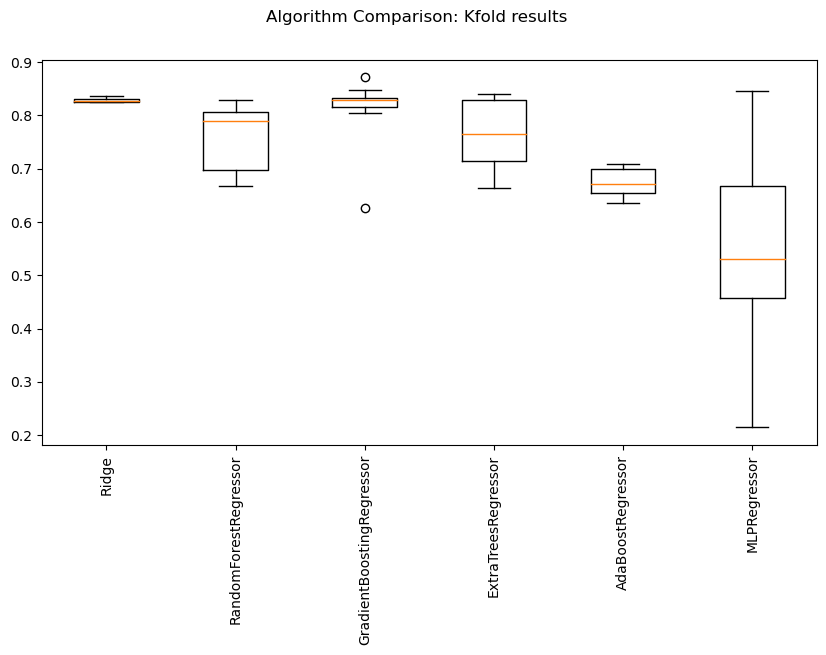

In [56]:
# Plotting K-Fold results
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(grid_search_results.keys(), rotation=90)
fig.set_size_inches(10,5)
plt.show()

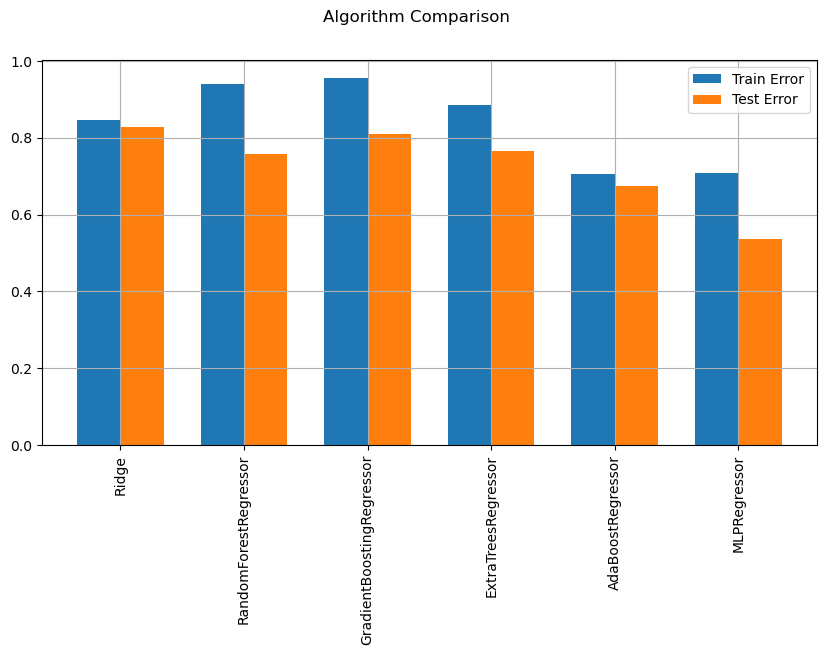

In [57]:
# Model comparison to check underfitting and overfitting
fig = plt.figure()

ind = np.arange(len(grid_search_results.keys()))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(10,5)
plt.grid()
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(grid_search_results.keys(), rotation=90)
plt.show()

In [135]:
# Best model after analysis
# best_model = grid_search_results['GradientBoostingRegressor']['best_model']
best_model = grid_search_results['Ridge']['best_model']

best_model.fit(X_train, y_train)

# Test set predictions
y_pred_test = best_model.predict(X_test) # Predict on the test data
cum_ret_test = np.cumprod(y_pred_test + 1) - 1 # cumulative returns
test_dates = X_test.index # Get the test dates for plotting

# Test set predictions
y_pred_train = best_model.predict(X_train) # Predict on the test data
cum_ret_train = np.cumprod(y_pred_train + 1) - 1 # cumulative returns
train_dates = X_train.index # Get the test dates for plotting

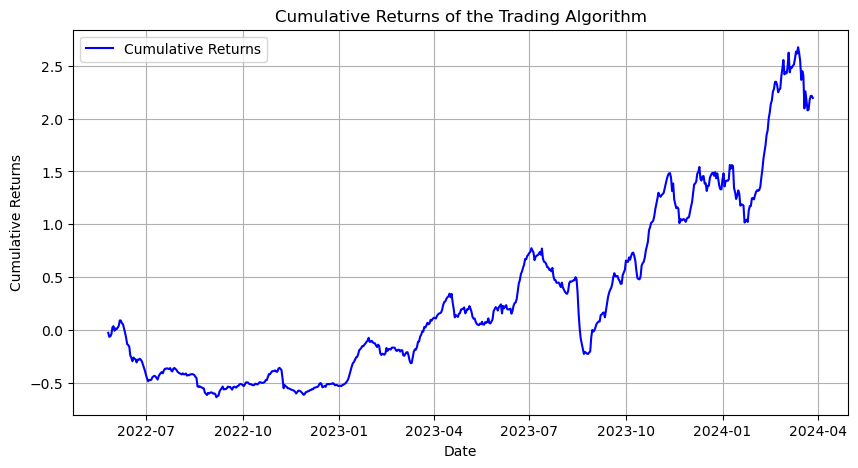

In [137]:
# Plotting the out-sample cumulative returns
plt.figure(figsize=(10, 5))
plt.plot(test_dates, cum_ret_test, label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns of the Trading Algorithm')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Out-sample performance
cagr = (1 + cum_ret_test[-1]) ** (365 / len(cum_ret_test)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cum_ret_test)
ratio = (360.0 ** (1.0/2.0)) * np.mean(cum_ret_test) / np.std(cum_ret_test)
print (('Out-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))

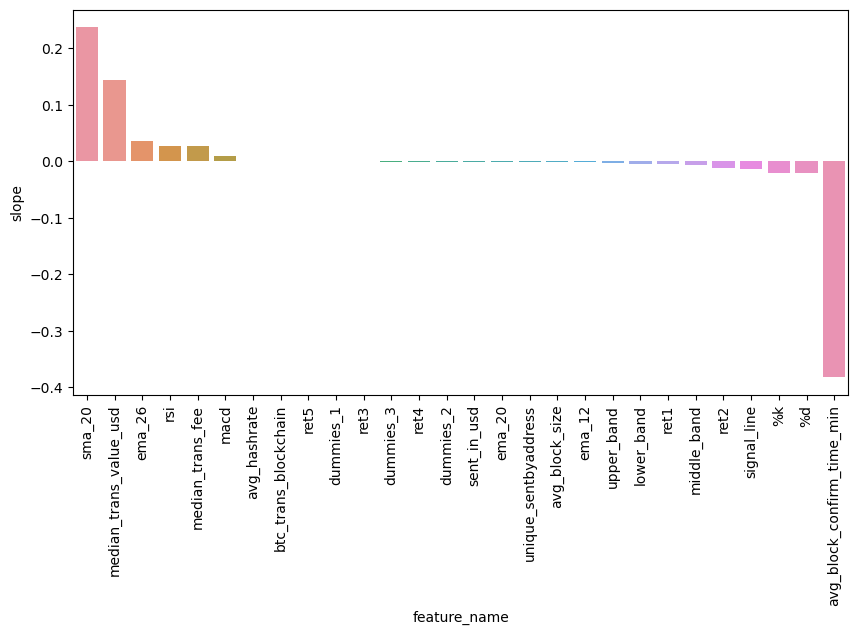

In [143]:
column_names = []
num_numeric = int(len(numeric_features)*100/100)

num_dummies = len(best_model.named_steps['regressor'].coef_.tolist()[0])-num_numeric
for i in range(1,num_dummies+1):
    column_names.append('dummies_'+str(i))

for i in numeric_features:
    column_names.append(i)

##plot the coefficients
importance = pd.DataFrame(zip(best_model.named_steps['regressor'].coef_.tolist()[0], column_names))
importance.columns = ['slope','feature_name']

plt.figure(figsize=(10, 5))
importance_plot = sns.barplot(x=importance['feature_name'], 
                              y=importance['slope'], 
                              data=importance, orient='v', 
                              dodge=False, 
                              order=importance.sort_values('slope',ascending=False).feature_name)
for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)

In [144]:
# Simulate the trading stretegy over test set only 
initial_investment = 1000

# Simulate the daily updates to the portfolio value
portfolio_values = [initial_investment]
for daily_return in y_pred_test.ravel():
    new_value = portfolio_values[-1] * (1 + daily_return)
    portfolio_values.append(new_value)

# Convert the list to a numpy array for easier handling
portfolio_values = np.array(portfolio_values)

In [145]:
# Buy and hold stretegy

# Initial asset price with an base price on that day
asset_prices = df_original[df_original.index.date == test_dates[0].date()]['open'].to_list()
for ret in y_test.values.ravel():
    new_price = asset_prices[-1] * (1 + ret)
    asset_prices.append(new_price)

# Convert asset prices to a numpy array
asset_prices = np.array(asset_prices)

initial_price = asset_prices[0]
shares_bought = initial_investment / initial_price  # Number of shares bought initially

# Calculate the portfolio value over time
portfolio_values_bh = shares_bought * asset_prices


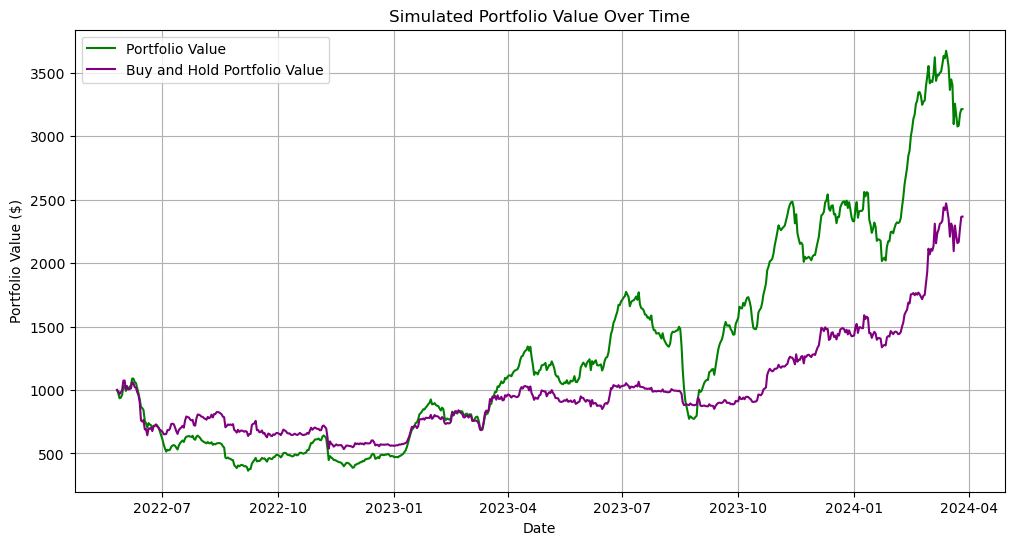

Final Portfolio Value (with trading rule): 3195.045732083863
Final Portfolio Value (with buy and hold rule): 2367.4082717962606


In [146]:
# Plotting the simulated portfolio values
plt.figure(figsize=(12, 6))
plt.plot(test_dates, portfolio_values[:-1], label='Portfolio Value', color='green')  # excluding the last value for aligning with dates
plt.plot(test_dates, portfolio_values_bh[:-1], label='Buy and Hold Portfolio Value', color='purple')  # drop the last to align
plt.title('Simulated Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

print("Final Portfolio Value (with trading rule):", portfolio_values[-1])
print("Final Portfolio Value (with buy and hold rule):", portfolio_values_bh[-1])

In [ ]:
# # Simulate the trading stretegy on the full data

# # Predict on the full data
# y_pred = best_model.predict(X)

# # Evaluate the performance on the test set using Spearman's rank correlation
# test_score = information_coefficient(y, y_pred)

# # Simulate the trading algo
# # Initial Portfolio Value
# initial_investment = 1000

# # Simulate the daily updates to the portfolio value
# portfolio_values = [initial_investment]
# for daily_return in y_pred:
#     new_value = portfolio_values[-1] * (1 + daily_return)
#     portfolio_values.append(new_value)

# # Convert the list to a numpy array for easier handling
# portfolio_values = np.array(portfolio_values)


# dates = X.index
# # Plotting the simulated portfolio values
# plt.figure(figsize=(12, 6))
# plt.plot(dates, portfolio_values[:-1], label='Portfolio Value', color='green')  # excluding the last value for aligning with dates
# plt.title('Simulated Portfolio Value Over Time')
# plt.xlabel('Date')
# plt.ylabel('Portfolio Value ($)')
# plt.legend()
# plt.grid(True)
# plt.show()

# print("Final Portfolio Value:", portfolio_values[-1])

average return 0.000502
[-0.00030113  0.00032686]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.0026000000000000467


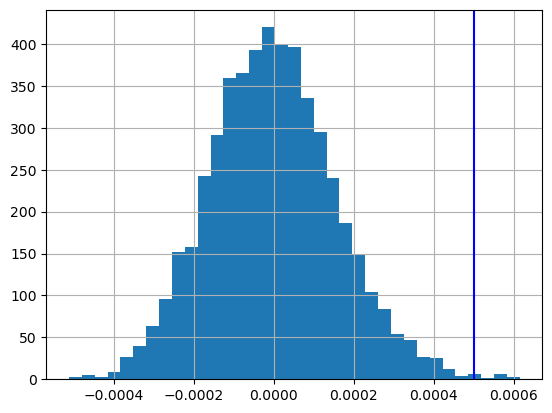

In [147]:
# White reality check
import detrendPrice
import WhiteRealityCheckFor1

openp = df_original['open'][train_len:]

#Detrending Prices and Returns and white reality check
detrended_open = detrendPrice.detrendPrice(openp)

detrended_retFut1 = detrended_open.pct_change(periods=1).fillna(0)
detrended_syst_rets = detrended_retFut1 * pd.Series(y_pred_test.ravel()).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
plt.show()